In [2]:
# IF TensorFlow 1
# !pip install tensorflow-gpu==2.4.0 keras==2.4.3
# !pip install tensorflow-gpu==1.15.0 keras==2.3.1
# !pip3 uninstall -y keras-nightly
# !pip3 uninstall -y tensorflow
# !pip3 install -y keras
# !pip3 install -y tensorflow
# !pip3 install h5py
!pip install aeon
!pip3 install onnx
!pip3 uninstall -y tf2onnx
!pip install git+https://github.com/onnx/tensorflow-onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.0/39.0 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 41.2 MB/s eta 0:00:00
  Cloning https://github.com/onnx/tensorflow-onnx to /tmp/pip-req-build-tpdm5884
  Running command git clone --filter=blob:none --quiet https://github.com/onnx/tensorflow-onnx /tmp/pip-req-build-tpdm5884
  Resolved https://github.com/onnx/tensorflow-onnx to commit d5b7f39de66f3b4ff8731fd23b3f379ae731e601
  Preparing metadata (setup.py) ... done
  Created wheel for tf2onnx: filename=tf2onnx-1.15.1-py3-none-any.whl size=454736 sha256=40d963835b0eb78f766e03e7a6eb175a72235e87caf51401d9086dd08c9ed072
  Stored in directory: /tmp/pip-ephem-wheel-cache-q0wb61s3/wheels/42/b4/7f/f00be6b8e1adcc24edcdd0d778f3416f568de22479ed30aab8
Successfully built tf2onnx


In [3]:
import sklearn
from sklearn import svm, datasets
import scipy.io as scp

#from scipy import loadmat
from time import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, fbeta_score

from sklearn.model_selection import train_test_split


#from tensorflow.keras import optimizers
#from tensorflow.keras.callbacks import LearningRateScheduler
#from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D,Dropout,SeparableConv2D
from tensorflow.keras.layers import Conv1D,AveragePooling1D,AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
#from keras.utils import layer_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.keras.applications.imagenet_utils import preprocess_input

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model

import tensorflow.python.keras.backend as K
import math
#from matplotlib.pyplot import imshow
#import pydot
import h5py

import tf2onnx

import pandas as pd

tf.keras.utils.set_random_seed(42)

In [4]:
from aeon.datasets import load_classification
X_train, y_train_nohot, meta_data = load_classification("ECG5000", split="TRAIN")
X_test, y_test_nohot, _ = load_classification("ECG5000", split="TEST")

# Adjust label from string to integer, and start from 0 instead of 1
classes = [int(c) -1 for c in meta_data["class_values"]]
y_train_nohot = np.asarray([int(n) - 1 for n in y_train_nohot])
y_test_nohot = np.asarray([int(n) - 1 for n in y_test_nohot])

#print("Classes:", classes)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train_nohot.shape)
print("Shape of y_test:", y_test_nohot.shape)

Shape of X_train: (500, 1, 140)
Shape of X_test: (4500, 1, 140)
Shape of y_train: (500,)
Shape of y_test: (4500,)


In [5]:
# ========================================================
# Only for ecg-tcn code of Thorir! V. 1

import torch
#import os

torch.save(
    torch.from_numpy(X_train).type(torch.float),
    "ECG5000_train.pt"
)
torch.save(
    torch.from_numpy(y_train_nohot).type(torch.long),
    "ECG5000_train_labels.pt"
)
torch.save(
    torch.from_numpy(X_test).type(torch.float),
    "ECG5000_test.pt"
)
torch.save(
    torch.from_numpy(y_test_nohot).type(torch.long),
    "ECG5000_test_labels.pt"
)

TypeError: ignored

In [6]:
# ========================================================
# Only for ecg-tcn code of Thorir! V.2 Train

import torch

X_train_float = X_train.astype(np.float32)
y_train_nohot_long = y_train_nohot.astype(np.int64)

# Convert TRAIN NumPy arrays to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_float)
y_train_nohot_tensor = torch.Tensor(y_train_nohot_long).long()

torch.save(X_train_tensor, 'ECG5000_train.pt')
torch.save(y_train_nohot_tensor, 'ECG5000_train_labels.pt')

X_train_loaded = torch.load('ECG5000_train.pt')
y_train_nohot_loaded = torch.load('ECG5000_train_labels.pt')



In [8]:
# ========================================================
# Only for ecg-tcn code of Thorir! V.2 Test

X_test_float = X_test.astype(np.float32)
y_test_nohot_long = y_test_nohot.astype(np.int64)

# Convert TEST NumPy arrays to PyTorch tensors
X_test_tensor = torch.Tensor(X_test_float)
y_test_nohot_tensor = torch.Tensor(y_test_nohot_long).long()

torch.save(X_test_tensor, 'ECG5000_test.pt')
torch.save(y_test_nohot_tensor, 'ECG5000_test_labels.pt')

X_test_loaded = torch.load('ECG5000_test.pt')
y_test_nohot_loaded = torch.load('ECG5000_test_labels.pt')

In [ ]:
#plt.figure(figsize=(24.0, 8.0))
#plt.plot(X_train[2].flatten())
#plt.grid()
#plt.show()

In [5]:
# Apply one-hot encoding
n_classes = len(classes)
y_train = np.zeros((y_train_nohot.shape[0], n_classes))
y_test = np.zeros((y_test_nohot.shape[0], n_classes))

label_counter_train = {k: 0 for k in classes}
label_counter_test = {k: 0 for k in classes}
for i, l in enumerate(y_train_nohot):
    y_train[i, l] = 1
    label_counter_train[l] += 1
for i, l in enumerate(y_test_nohot):
    y_test[i, l] = 1
    label_counter_test[l] += 1

print("Training set:")
for k, v in label_counter_train.items():
    print(f"\t{k}: {v}")
print("Test set:")
for k, v in label_counter_test.items():
    print(f"\t{k}: {v}")
print('y_train',y_train)

Training set:
	0: 292
	1: 177
	2: 10
	3: 19
	4: 2
Test set:
	0: 2627
	1: 1590
	2: 86
	3: 175
	4: 22
y_train [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [6]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (500, 1, 140, 1)
Shape of X_test: (4500, 1, 140, 1)
Shape of y_train: (500, 5)
Shape of y_test: (4500, 5)


In [7]:
# ========================================================
# Application of weights to the classes based on the occurences

from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight

train_class_weights = compute_class_weight("balanced", classes=classes, y=y_train_nohot)
train_class_weights = {idx: i for idx, i in enumerate(train_class_weights)}
train_class_weights

{0: 0.3424657534246575,
 1: 0.5649717514124294,
 2: 10.0,
 3: 5.2631578947368425,
 4: 50.0}

In [8]:
def Net(input_shape):
    _, win_len, n_ch = input_shape

    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    X = X_input

    # CONV -> BN -> RELU Block applied to X
    #X = DepthwiseConv2D(NUMBER_OF_CHANNELS, (1, 7), name='conv0')(X)  #DepthWiseConv applies the filter to each channel of the immage and gives to output n channels
    # Zero-Padding: pads the border of X_input with zeroes
    X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0, 6)), data_format=None)(X)
    X = Conv2D(kernel_size =(1, 7), filters = n_ch, strides=(1, 1), dilation_rate=(1, 1), padding = 'valid', name='conv0')(X)  #in questo layer il numero di filters=CHANNELS che è uguale a 1
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu',name='relu_0')(X)

    # AVGPOOL
    X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0,1)), data_format=None)(X)
    X = AveragePooling2D((1, 2),strides=(1, 1), padding='valid', name='avg_pool0')(X) #cambiato padding in 'same'

    # CONV -> BN -> RELU Block applied to X
    X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0, 18)), data_format=None)(X) # padding=(0,0),(0,(kernel_size[1]-1)*dilation_rate[1]))
    X = Conv2D(1, (1, 10), strides=(1, 1), dilation_rate=(1, 2), padding = 'valid', name='conv1')(X)
    X = BatchNormalization(axis=3, name='bn1')(X)
    X = Activation('relu',name='relu_1')(X)

    # MAXPOOL
    #X = MaxPooling2D((2, 2),strides=(2, 1), name='max_pool1',)(X)
    X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0,1)), data_format=None)(X)
    # X = Conv2D(4, (1, 1), strides=(1, 1), dilation_rate=(1, 1), padding = 'valid', name='conv_accesory_1')(X)
    X = MaxPooling2D((1, 2),name='max_pool1')(X)


    # CONV -> BN -> RELU Block applied to X
    X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0, 48)), data_format=None)(X)
    X = Conv2D(2, (1, 13), strides=(1, 1), dilation_rate=(1, 4), padding = 'valid',name='conv2')(X)    #IL FILTRO ERA 13 13 !!!!
    X = BatchNormalization(axis=3, name='bn2')(X)
    X = Activation('relu',name='relu_2')(X)

    # MAXPOOL
    X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0,1)), data_format=None)(X)
    # X = Conv2D(8, (1, 1), strides=(1, 1), dilation_rate=(1, 1), padding = 'valid', name='conv_accesory_2')(X)
    X = MaxPooling2D((1, 2), name='max_pool2')(X)

    # CONV -> BN -> RELU Block applied to X
    #X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0, 44)), data_format=None)(X)
    #X = Conv2D(4, (1, 12), strides=(1, 1), dilation_rate=(1, 4),  padding = 'valid', name='conv3')(X) #cambiato 'same'' in 'valid'
    X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0, 88)), data_format=None)(X)
    X = Conv2D(4, (1, 12), strides=(1, 1), dilation_rate=(1, 8),  padding = 'valid', name='conv3')(X)
    X = BatchNormalization(axis=3, name='bn3')(X)
    X = Activation('relu',name='relu_3')(X)

    # MAXPOOL
    X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0,1)), data_format=None)(X)
    # X = Conv2D(16, (1, 1), strides=(1, 1), dilation_rate=(1, 1), padding = 'valid', name='conv_accesory_3')(X)
    X = MaxPooling2D((1, 2), name='max_pool3')(X)

    # CONV -> BN -> RELU Block applied to X
    #X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0, 52)), data_format=None)(X)
    #X = Conv2D(16, (1, 14), strides=(1, 1), dilation_rate=(1, 4), padding = 'valid', name='conv4')(X) #cambiato valid in 'same'
    X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0, 104)), data_format=None)(X)
    X = Conv2D(16, (1, 14), strides=(1, 1), dilation_rate=(1, 8), padding = 'valid', name='conv4')(X)
    X = BatchNormalization(axis=3, name='bn4')(X)
    X = Activation('relu',name='relu_4')(X)

    # MAXPOOL
    X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0, 1)), data_format=None)(X)
    X = MaxPooling2D((1, 2), name='max_pool4')(X)

    # CONV -> BN -> RELU Block applied to X
    X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0, 15)), data_format=None)(X)
    X = Conv2D(8, (1, 16), strides=(1, 1), dilation_rate=(1, 1), padding = 'valid', name='conv5')(X) #cambiato 'valid' in 'same'
    X = BatchNormalization(axis=3, name='bn5')(X)
    X = Activation('relu',name='relu_5')(X)

    X = tf.keras.layers.ZeroPadding2D(padding=((0,0),(0, 1)), data_format=None)(X)
    X = Conv2D(32, (1, 1), strides=(1, 1), dilation_rate=(1, 1), padding = 'valid', name='conv6')(X)    #IL FILTRO ERA 13 13 !!!! #cambiato valid in 'same'
    X = BatchNormalization(axis=3, name='bn6')(X)
    X = Activation('relu',name='relu_6')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(n_classes, activation='linear', name='fc1')(X)

    X = tf.keras.layers.Softmax()(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='HappyModel')


    return model

In [9]:
#sample = 250*10  #SIZE OF THE IMAGE (WINDOWS).. IMAGE IS sample x nchannels  long image 1024
win_len = X_train.shape[2]            # 140 samples, i.e. heart beat length
n_ch = X_train.shape[3]               # 1 channel
print("N. of channels:", n_ch)
print("Windows len:", win_len)

modello = Net((1, win_len, n_ch))
modello.summary()

N. of channels: 1
Windows len: 140
Model: "HappyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 140, 1)]       0         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 1, 146, 1)         0         
 g2D)                                                            
                                                                 
 conv0 (Conv2D)              (None, 1, 140, 1)         8         
                                                                 
 bn0 (BatchNormalization)    (None, 1, 140, 1)         4         
                                                                 
 relu_0 (Activation)         (None, 1, 140, 1)         0         
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 1, 141, 1)         0         
 ing2D)              

In [10]:
# ================================
# Test data Split

X_val, X_test_2, y_val, y_test_2 = train_test_split(X_test, y_test, test_size=0.8, random_state=42)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test_2:", X_test_2.shape) #X_test_2 is 80% of X_test
print("Shape of y_val:", y_val.shape)
print("Shape of y_test_2:", y_test_2.shape)
#print(y_test_2)

Shape of X_val: (900, 1, 140, 1)
Shape of X_test_2: (3600, 1, 140, 1)
Shape of y_val: (900, 5)
Shape of y_test_2: (3600, 5)


In [11]:
y_test_nohot_2=[]
for i in y_test_2:
  y_test_nohot_2.append(str(np.argmax(i)+1))
print(np.unique(y_test_nohot_2))
y_test_nohot_2=np.array(y_test_nohot_2)


['1' '2' '3' '4' '5']


In [ ]:
#sample_weight=np.ones((X_train.shape[0]))
#for idx,i in enumerate(y_train):
#  sample_weight[idx]*=train_weights[int(np.argmax(i))]
#sample_weight

In [12]:
from collections import Counter
from collections.abc import Collection


def _data_distribution_helper(
    y: np.ndarray, label_dict: dict[str, int], ax: plt.Axes
) -> None:
    """Helper function to plot the distribution of the labels of a single dataset."""
    # Count labels
    y_count = Counter(y)

    g_range = list(label_dict.values())
    ax.bar(
        x=g_range,
        height=[y_count[g] for g in g_range],
    )
    ax.set_xticks(g_range)
    ax.set_xticklabels(label_dict.keys(), rotation=45)


def data_distribution(
    y: np.ndarray | Collection[np.ndarray],
    label_dict: dict[str, int],
    title: str | Collection[str] | None = None,
    fig_size: tuple[int, int] | None = None,
    file_name: str | None = None,
) -> None:
    """Plot the distribution of the labels of a given dataset (or list of datasets).

    Parameters
    ----------
    y : ndarray or list of ndarray
        An array (or a list of arrays) containing the labels of a dataset.
    label_dict : dict of {str, int}
        Dictionary mapping string labels to the respective integer labels.
    title : str or list of str or None, default=None
        String (or list of strings) representing the title(s) of the plot(s).
    fig_size : tuple of (int, int) or None, default=None
        Height and width of the plot.
    file_name : str or None, default=None
        Name of the file where the image will be saved to.
    """
    # Check for single or multiple plots
    if isinstance(y, np.ndarray):  # single plot
        assert (
            isinstance(title, str) or title is None
        ), "'y' is a single array, thus 'title' should be single as well."

        # Create figure
        _, ax = plt.subplots(figsize=fig_size, layout="constrained")

        # Plot bar plot
        _data_distribution_helper(y, label_dict, ax)

        # Set title
        if title is not None:
            ax.set_title(title)
    elif isinstance(y, Collection):  # multiple plots
        assert (
            isinstance(title, Collection) and len(y) == len(title)
        ) or title is None, (
            "'y' is a list of arrays, thus 'title' (if provided) should be a list as well, "
            "with the same length as 'y'."
        )

        # Compute number of rows
        n_plots = len(y)
        n_cols = 2
        mod = n_plots % n_cols
        n_rows = n_plots // n_cols if mod == 0 else n_plots // n_cols + mod
        # Create figure with subplots and shared x-axis
        _, axes = plt.subplots(
            n_rows,
            n_cols,
            sharex="all",
            sharey="all",
            squeeze=False,
            figsize=fig_size,
            layout="constrained",
        )
        axes = [ax for nested_ax in axes for ax in nested_ax]  # flatten axes

        # Plot barplots
        opt_title_list = [None] * len(y) if title is None else title
        for y, t, a in zip(y, opt_title_list, axes):
            _data_distribution_helper(y, label_dict, a)
            # Set title
            if t is not None:
                a.set_title(t)
    else:
        raise NotImplementedError(
            "This function does not support the given parameters."
        )

    if file_name is not None:
        plt.savefig(file_name)
    else:
        plt.show()


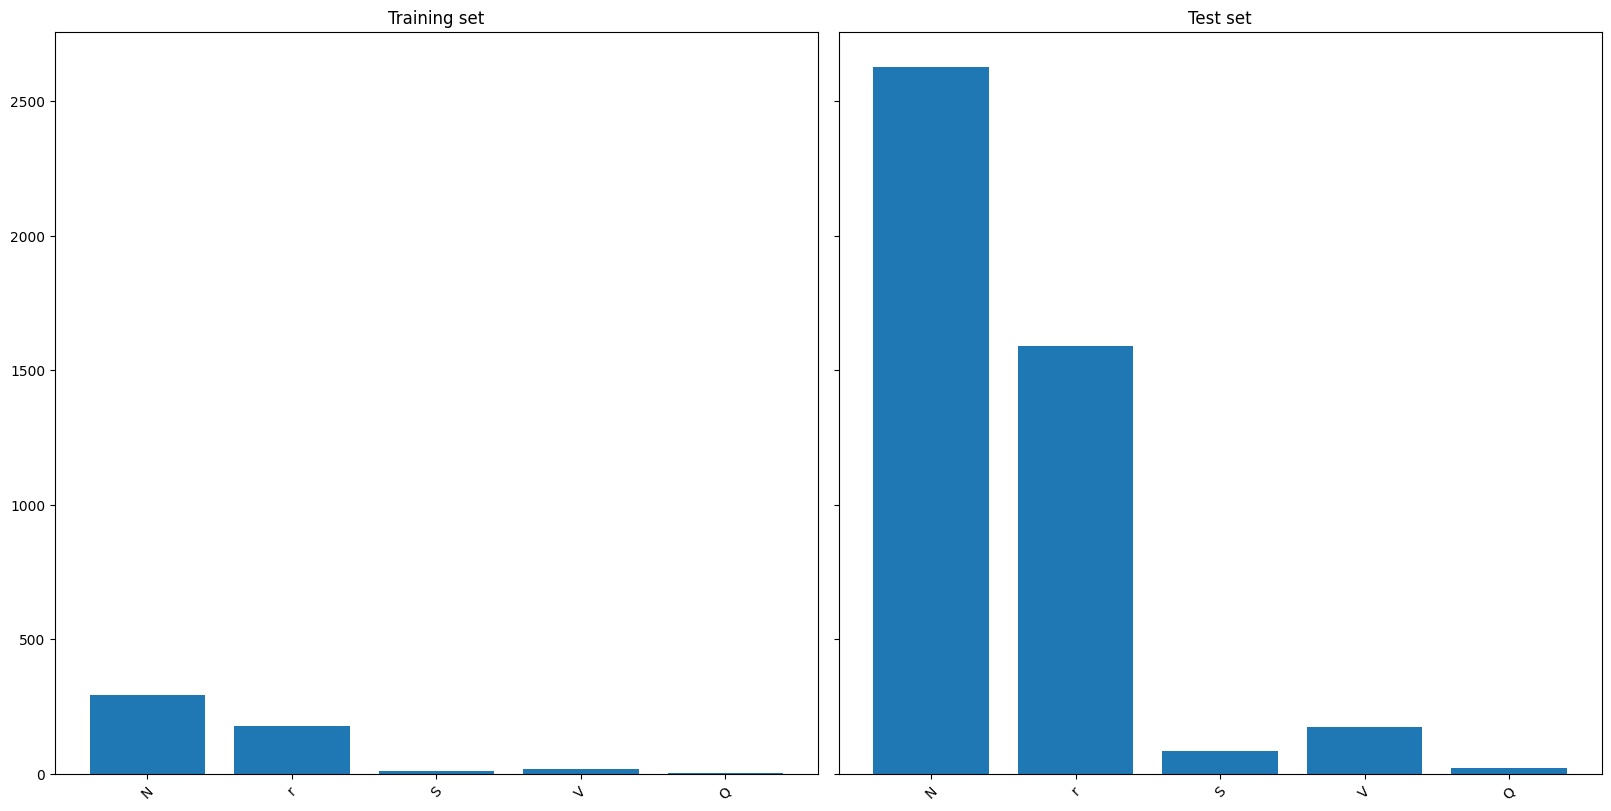

Training subset:
	0: 292
	1: 177
	2: 10
	3: 19
	4: 2
Test set:
	0: 2627
	1: 1590
	2: 86
	3: 175
	4: 22


In [13]:
# ================================
# Train subset and Test Data label mapping

label_mapping = {
    "N": 0,
    "r": 1,
    "S": 2,
    "V": 3,
    "Q": 4,
}

data_distribution(
    [y_train_nohot, y_test_nohot],
    label_mapping,
    ["Training set", "Test set"],
    fig_size=(16, 8),
)

label_counter_train = {k: 0 for k in classes}
label_counter_test = {k: 0 for k in classes}
for i, l in enumerate(y_train_nohot):
    label_counter_train[l] += 1
for i, l in enumerate(y_test_nohot):
    label_counter_test[l] += 1

print("Training subset:")
for k, v in label_counter_train.items():
    print(f"\t{k}: {v}")
print("Test set:")
for k, v in label_counter_test.items():
    print(f"\t{k}: {v}")

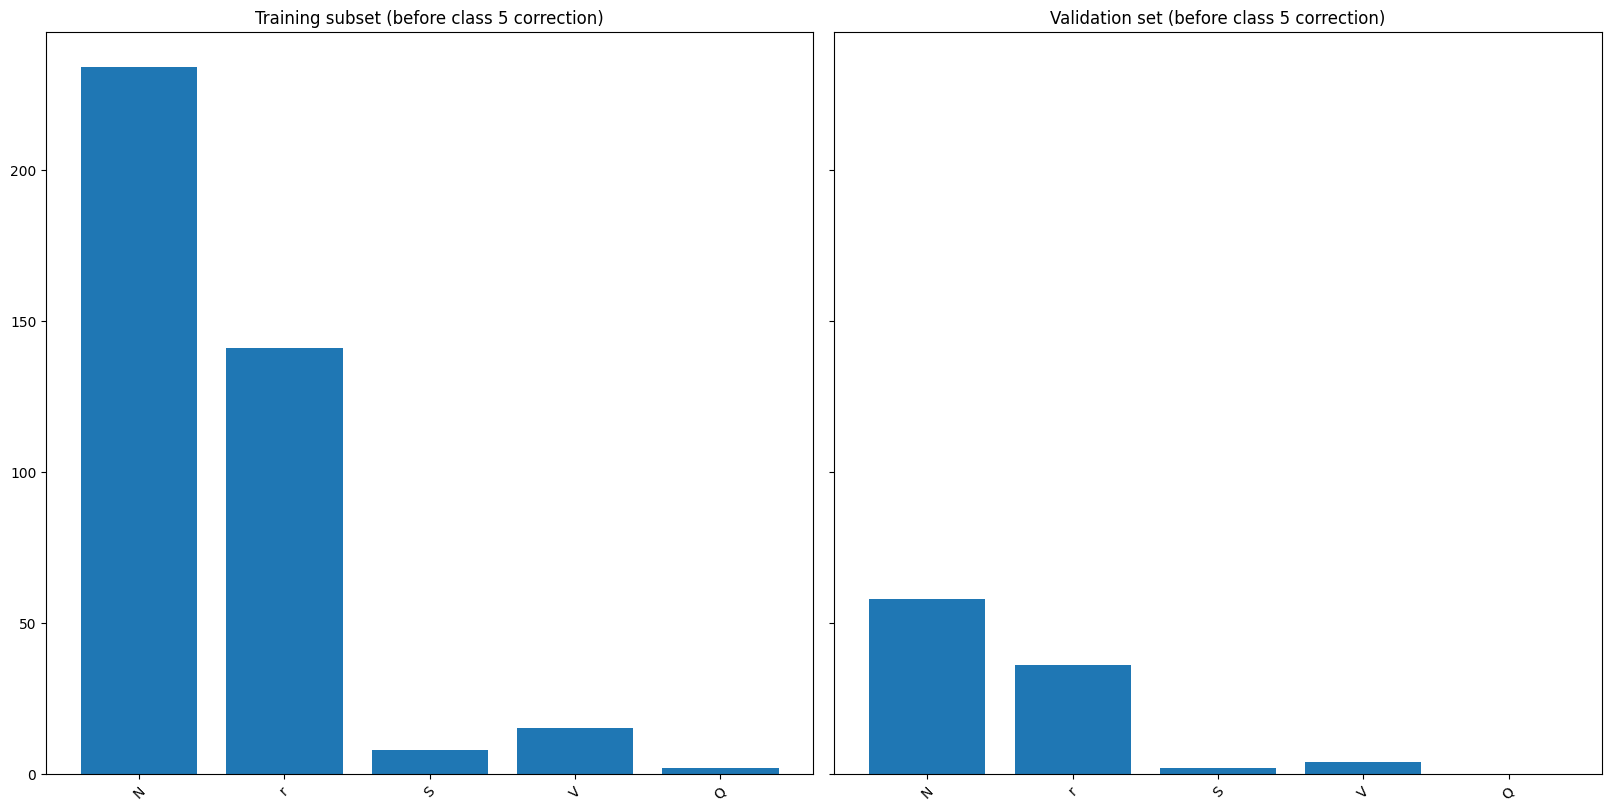

Training subset (before class 5 correction):
	0: 234
	1: 141
	2: 8
	3: 15
	4: 2
Validation set (before class 5 correction):
	0: 58
	1: 36
	2: 2
	3: 4
	4: 0


In [14]:
# ================================
# Train data Split

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
y_train2_nohot = np.zeros(shape=(0,), dtype="int32")
y_val_nohot = np.zeros(shape=(0,), dtype="int32")
for y in y_train2:
    y_train2_nohot = np.append(y_train2_nohot, np.argmax(y))
for y in y_val:
    y_val_nohot = np.append(y_val_nohot, np.argmax(y))

data_distribution(
    [y_train2_nohot, y_val_nohot],
    label_mapping,
    #["Training set 2 (before class 5 correction)", "Validation set (before class 5 correction)"],
    ["Training subset (before class 5 correction)", "Validation set (before class 5 correction)"],
    fig_size=(16, 8),
)

label_counter_train2 = {k: 0 for k in classes}
label_counter_val = {k: 0 for k in classes}
for i, l in enumerate(y_train2_nohot):
    label_counter_train2[l] += 1
for i, l in enumerate(y_val_nohot):
    label_counter_val[l] += 1

#print("Training set 2 (before class 5 correction):")
print("Training subset (before class 5 correction):")
for k, v in label_counter_train2.items():
    print(f"\t{k}: {v}")
print("Validation set (before class 5 correction):")
for k, v in label_counter_val.items():
    print(f"\t{k}: {v}")

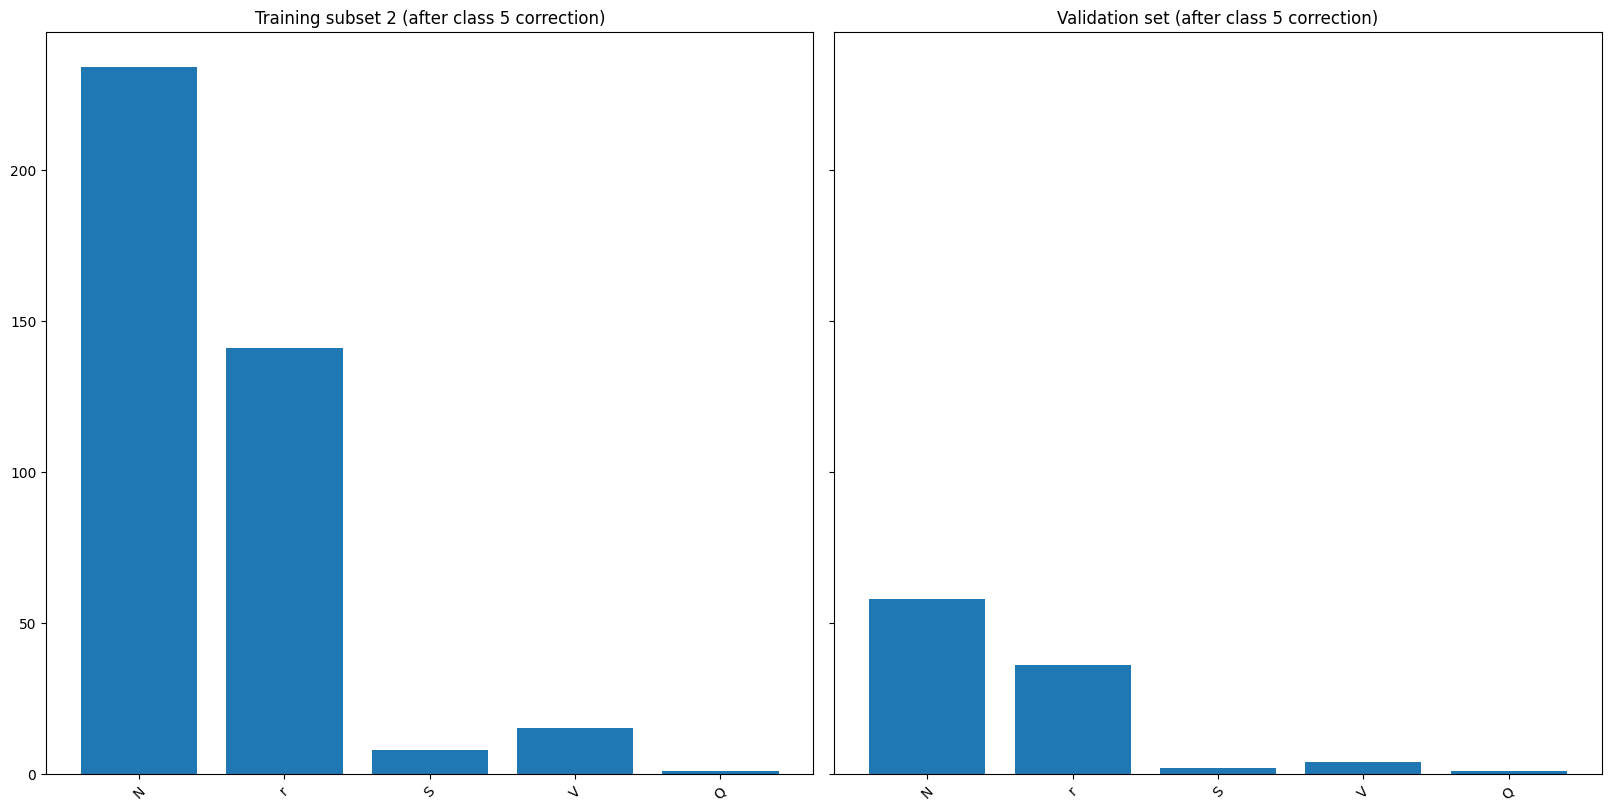

Training subset 2 (after class 5 correction):
	0: 234
	1: 141
	2: 8
	3: 15
	4: 1
Validation set (after class 5 correction):
	0: 58
	1: 36
	2: 2
	3: 4
	4: 1


In [15]:
X_cls5, y_cls5 = X_train2[y_train2_nohot == 4], y_train2[y_train2_nohot == 4]
X_train2 = X_train2[y_train2_nohot != 4]
y_train2 = y_train2[y_train2_nohot != 4]
y_train2_nohot = y_train2_nohot[y_train2_nohot != 4]
X_train2 = np.concatenate([X_train2, np.expand_dims(X_cls5[0], 0)])  # Forcing class 5 appears in both X_train and X_val
y_train2 = np.concatenate([y_train2, np.expand_dims(y_cls5[0], 0)])
y_train2_nohot = np.append(y_train2_nohot, 4)
X_val = np.concatenate([X_val, np.expand_dims(X_cls5[1], 0)])        # Forcing class 5 appears in both X_train and X_val
y_val = np.concatenate([y_val, np.expand_dims(y_cls5[1], 0)])

y_train2_nohot = np.zeros(shape=(0,), dtype="int32")
y_val_nohot = np.zeros(shape=(0,), dtype="int32")
for y in y_train2:
    y_train2_nohot = np.append(y_train2_nohot, np.flatnonzero(y))
for y in y_val:
    y_val_nohot = np.append(y_val_nohot, np.flatnonzero(y))

data_distribution(
    [y_train2_nohot, y_val_nohot],
    label_mapping,
    ["Training subset 2 (after class 5 correction)", "Validation set (after class 5 correction)"],
    fig_size=(16, 8),
)

label_counter_train2 = {k: 0 for k in classes}
label_counter_val = {k: 0 for k in classes}
for i, l in enumerate(y_train2_nohot):
    label_counter_train2[l] += 1
for i, l in enumerate(y_val_nohot):
    label_counter_val[l] += 1

print("Training subset 2 (after class 5 correction):")
for k, v in label_counter_train2.items():
    print(f"\t{k}: {v}")
print("Validation set (after class 5 correction):")
for k, v in label_counter_val.items():
    print(f"\t{k}: {v}")

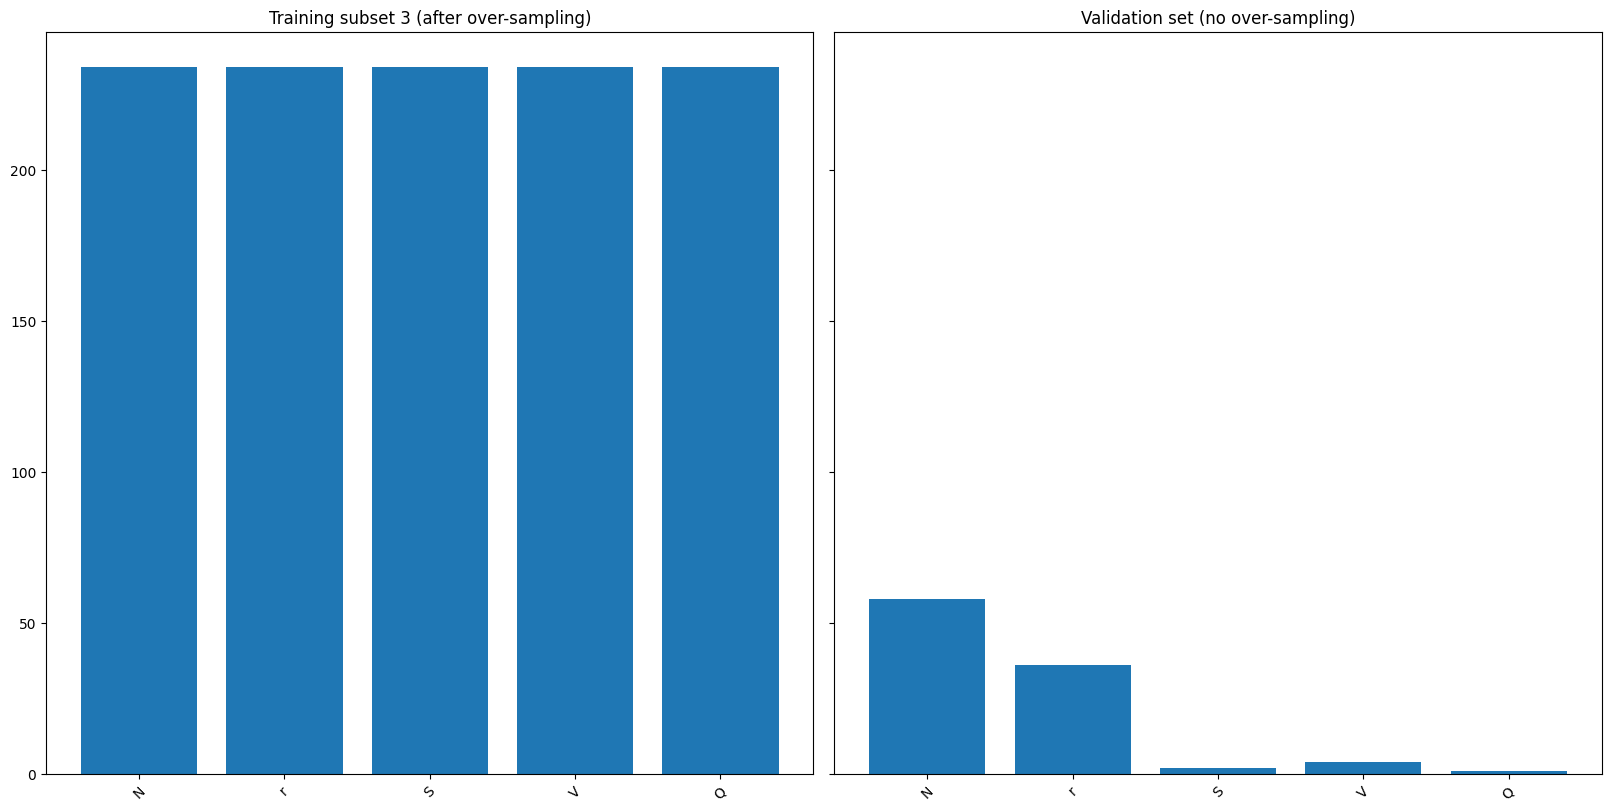

Training subset 3 (after over-sampling):
	0: 234
	1: 234
	2: 234
	3: 234
	4: 234
Validation set (no over-sampling):
	0: 58
	1: 36
	2: 2
	3: 4
	4: 1


In [16]:
n = np.count_nonzero(y_train2_nohot == 0)  # most frequent label
X_train3 = X_train2[y_train2_nohot == 0]
y_train3 = y_train2[y_train2_nohot == 0]
for c in [1, 2, 3, 4]:
    c_idx = np.where(y_train2_nohot == c)[0]
    choices = np.random.choice(c_idx, n)
    X_train3 = np.concatenate([X_train3, X_train2[choices]])
    y_train3 = np.concatenate([y_train3, y_train2[choices]])

y_train3_nohot = np.zeros(shape=(0,), dtype="int32")
for y in y_train3:
    y_train3_nohot = np.append(y_train3_nohot, np.flatnonzero(y))

data_distribution(
    [y_train3_nohot, y_val_nohot],
    label_mapping,
    ["Training subset 3 (after over-sampling)", "Validation set (no over-sampling)"],
    fig_size=(16, 8),
)

label_counter_train3 = {k: 0 for k in classes}
label_counter_val = {k: 0 for k in classes}
for i, l in enumerate(y_train3_nohot):
    label_counter_train3[l] += 1
for i, l in enumerate(y_val_nohot):
    label_counter_val[l] += 1

print("Training subset 3 (after over-sampling):")
for k, v in label_counter_train3.items():
    print(f"\t{k}: {v}")
print("Validation set (no over-sampling):")
for k, v in label_counter_val.items():
    print(f"\t{k}: {v}")

In [17]:
# ================================
# Cross-validation + Over-sampling
# ================================

n_runs = 10
hist_dict = {}
model_list = []

for r in range(n_runs):
    print(f"---------- RUN {r + 1} ----------")

    # 1. Prepare data:
    # 1.1. Train/validation split
    X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)
    y_train2_nohot = np.zeros(shape=(0,), dtype="int32")
    for y in y_train2:
        y_train2_nohot = np.append(y_train2_nohot, np.flatnonzero(y))

    # 1.2. Handle class 5 which comprises only 2 samples and appears only in training set
    X_cls5, y_cls5 = X_train2[y_train2_nohot == 4], y_train2[y_train2_nohot == 4]
    X_train2 = X_train2[y_train2_nohot != 4]
    y_train2 = y_train2[y_train2_nohot != 4]
    y_train2_nohot = y_train2_nohot[y_train2_nohot != 4]
    X_train2 = np.concatenate([X_train2, np.expand_dims(X_cls5[0], 0)])  # Forcing class 5 appears in both X_train and X_val
    y_train2 = np.concatenate([y_train2, np.expand_dims(y_cls5[0], 0)])
    y_train2_nohot = np.append(y_train2_nohot, 4)
    X_val = np.concatenate([X_val, np.expand_dims(X_cls5[1], 0)])        # Forcing class 5 appears in both X_train and X_val
    y_val = np.concatenate([y_val, np.expand_dims(y_cls5[1], 0)])

    # 1.3. Over-sample training set
    n = np.count_nonzero(y_train2_nohot == 0)  # 2nd most frequent label
    X_train3 = X_train2[y_train2_nohot == 0]
    y_train3 = y_train2[y_train2_nohot == 0]
    for c in [1, 2, 3, 4]:
        c_idx = np.where(y_train2_nohot == c)[0]
        choices = np.random.choice(c_idx, n)
        X_train3 = np.concatenate([X_train3, X_train2[choices]])
        y_train3 = np.concatenate([y_train3, y_train2[choices]])
    # X_train3 = X_train2
    # y_train3 = y_train2

    # 1.4. Compute sample weights
    # train_sample_weight = compute_sample_weight("balanced", y_train3)
    val_sample_weight = compute_sample_weight("balanced", y_val)

    # 2. Create TCN
    model = Net((1, win_len, n_ch))
    loss = tf.keras.losses.CategoricalCrossentropy()  # from_logits=True) #from_logits era True perché non applicavamo la Softmax nel modello, invece per utilizzare la early_stopping_callback ci serve
    model.compile(optimizer="adam", loss=loss, weighted_metrics=["accuracy"])

    # 3. Train with early stopping
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=20,
        restore_best_weights=True,
    )
    hist = model.fit(
        X_train3,
        y_train3,
        epochs=100,
        verbose=2,
        batch_size=32,
        # sample_weight=train_sample_weight,
        validation_data=(X_val, y_val, val_sample_weight),
        callbacks=[early_stopping_callback]
    )

    hist_dict[r] = hist.history
    model_list.append((model, max(hist.history["val_accuracy"])))

---------- RUN 1 ----------
Epoch 1/100
37/37 - 5s - loss: 0.9222 - accuracy: 0.6747 - val_loss: 0.7977 - val_accuracy: 0.1022 - 5s/epoch - 126ms/step
Epoch 2/100
37/37 - 0s - loss: 0.4495 - accuracy: 0.8146 - val_loss: 0.8111 - val_accuracy: 0.2401 - 463ms/epoch - 13ms/step
Epoch 3/100
37/37 - 0s - loss: 0.3167 - accuracy: 0.8901 - val_loss: 0.8381 - val_accuracy: 0.2401 - 458ms/epoch - 12ms/step
Epoch 4/100
37/37 - 0s - loss: 0.2494 - accuracy: 0.9030 - val_loss: 0.8721 - val_accuracy: 0.2489 - 462ms/epoch - 12ms/step
Epoch 5/100
37/37 - 0s - loss: 0.2136 - accuracy: 0.9142 - val_loss: 0.9263 - val_accuracy: 0.2187 - 495ms/epoch - 13ms/step
Epoch 6/100
37/37 - 1s - loss: 0.1754 - accuracy: 0.9451 - val_loss: 0.9595 - val_accuracy: 0.2787 - 718ms/epoch - 19ms/step
Epoch 7/100
37/37 - 1s - loss: 0.1382 - accuracy: 0.9494 - val_loss: 0.9768 - val_accuracy: 0.2770 - 728ms/epoch - 20ms/step
Epoch 8/100
37/37 - 1s - loss: 0.1236 - accuracy: 0.9622 - val_loss: 0.9581 - val_accuracy: 0.2787 

In [ ]:
'''
# ========================================================
# NETWORK TRAINING
# ========================================================

#opt = keras.optimizers.Adam(learning_rate=0.01)
#net.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

## La validation accuracy da vedere è quella più alta ma ci serve solo per allenare

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=20,
    restore_best_weights=True,
)

# log_dir = "logs\\fit"
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

loss = tf.keras.losses.CategoricalCrossentropy()  # from_logits=True) #from_logits era True perché non applicavamo la Softmax nel modello, invece per utilizzare la early_stopping_callback ci serve
modello.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
history = modello.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=2,
    batch_size=32,
    validation_data=(X_test, y_test), # X_test is the data not splitted
    #validation_data=(X_val, y_val),  # X_val is 80% of X_test (it uses to train)
    #validation_split=0.2,      # 0.25 dei dati di training. Li usa come test ma solo per l'allenamento. I dati veri per il test cioè quelli che usiamo dove calcoliamo le accuracy è sopra dove c'è test_size
    class_weight=train_weights,
    #sample_weight=sample_weight,
    #kernel_regulizer = None,
    #shuffle=True,
    callbacks=[early_stopping_callback]  # , tensorboard_callback],
)
'''

'\nearly_stopping_callback = tf.keras.callbacks.EarlyStopping(\n    monitor="val_accuracy",\n    patience=20,\n    restore_best_weights=True,\n)\n\n# log_dir = "logs\\fit"\n# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)\n\nloss = tf.keras.losses.CategoricalCrossentropy()  # from_logits=True) #from_logits era True perché non applicavamo la Softmax nel modello, invece per utilizzare la early_stopping_callback ci serve\nmodello.compile(optimizer=\'adam\', loss=loss, metrics=[\'accuracy\'])\nhistory = modello.fit(\n    X_train,\n    y_train,\n    epochs=100,\n    verbose=2,\n    batch_size=32,\n    validation_data=(X_test, y_test), # X_test is the data not splitted\n    #validation_data=(X_val, y_val),  # X_val is 80% of X_test (it uses to train)\n    #validation_split=0.2,      # 0.25 dei dati di training. Li usa come test ma solo per l\'allenamento. I dati veri per il test cioè quelli che usiamo dove calcoliamo le accuracy è sopra dove c\'è tes

In [ ]:
'''
# ========================================================
# NETWORK TRAINING several times

n_runs = 10
hist_list = []

for r in range(n_runs):
  modello = Net((1, win_len, n_ch))
  loss = tf.keras.losses.CategoricalCrossentropy()  # from_logits=True) #from_logits era True perché non applicavamo la Softmax nel modello, invece per utilizzare la early_stopping_callback ci serve
  modello.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

  early_stopping_callback = tf.keras.callbacks.EarlyStopping(
      monitor="val_accuracy",
      patience=20,
      restore_best_weights=True,
  )

  history = modello.fit(
      X_train,
      y_train,
      epochs=100,
      verbose=2,
      batch_size=32,
      # validation_data=(X_val, y_val),
      #validation_split=0.2,      # 0.25 dei dati di training. Li usa come test ma solo per l'allenamento. I dati veri per il test cioè quelli che usiamo dove calcoliamo le accuracy è sopra dove c'è test_size
      class_weight=train_weights,
      callbacks=[early_stopping_callback]
  )
  hist_list.append(history)
  '''

'\nn_runs = 10\nhist_list = []\n\nfor r in range(n_runs):\n  modello = Net((1, win_len, n_ch))\n  loss = tf.keras.losses.CategoricalCrossentropy()  # from_logits=True) #from_logits era True perché non applicavamo la Softmax nel modello, invece per utilizzare la early_stopping_callback ci serve\n  modello.compile(optimizer=\'adam\', loss=loss, metrics=[\'accuracy\'])\n\n  early_stopping_callback = tf.keras.callbacks.EarlyStopping(\n      monitor="val_accuracy",\n      patience=20,\n      restore_best_weights=True,\n  )\n\n  history = modello.fit(\n      X_train,\n      y_train,\n      epochs=100,\n      verbose=2,\n      batch_size=32,\n      # validation_data=(X_val, y_val),\n      #validation_split=0.2,      # 0.25 dei dati di training. Li usa come test ma solo per l\'allenamento. I dati veri per il test cioè quelli che usiamo dove calcoliamo le accuracy è sopra dove c\'è test_size\n      class_weight=train_weights,\n      callbacks=[early_stopping_callback]\n  )\n  hist_list.append(h

In [18]:
def plot_classifier_hist(
    history: dict[int, dict[str, list[float]]],
    validation: bool = False,
    title: str | None = None,
    fig_size: tuple[int, int] | None = None
) -> None:
    """Plot the training and validation history of a classifier.

    Parameters
    ----------
    history : dict of {int, dict of {str, list of float}}
        Dictionary containing, for each run, another dictionary with the training history.
    validation : bool, default=False
        Whether to plot the validation history.
    title : str or None, default=None
        Title of the whole plot.
    fig_size : tuple of (int, int) or None, default=None
        Height and width of the plot.
    """
    if fig_size:
        plt.figure(figsize=fig_size)

    n_rows = 2 if validation else 1

    # Get maximum number of epochs across runs
    ep_runs = [len(h["loss"]) for _, h in history.items()]
    min_ep = min(ep_runs)

    # Training loss
    ax_loss = plt.subplot(n_rows, 2, 1)
    plt.title("Training loss")
    plt.xlabel("Epochs")

    avg_train_loss = np.zeros(shape=(0, min_ep))
    for i, h in history.items():
        arr = np.array(h["loss"])
        plt.plot(arr, alpha=0.3, label=f"Run {i + 1}")
        avg_train_loss = np.concatenate([avg_train_loss, arr.reshape(1, -1)[:, :min_ep]])

    avg_train_loss = avg_train_loss.mean(axis=0)
    plt.plot(avg_train_loss, label=f"Average across runs")
    plt.legend()

    # Training accuracy
    ax_acc = plt.subplot(n_rows, 2, 2)
    plt.title("Training accuracy")
    plt.xlabel("Epochs")

    avg_train_acc = np.zeros(shape=(0, min_ep))
    for i, h in history.items():
        arr = np.array(h["accuracy"])
        plt.plot(arr, alpha=0.3, label=f"Run {i + 1}")
        avg_train_acc = np.concatenate([avg_train_acc, arr.reshape(1, -1)[:, :min_ep]])

    avg_train_acc = avg_train_acc.mean(axis=0)
    plt.plot(avg_train_acc, label=f"Average across runs")
    plt.legend()

    if validation:
        # Validation loss
        plt.subplot(n_rows, 2, 3, sharex=ax_loss)
        plt.title("Validation loss")
        plt.xlabel("Epochs")

        avg_val_loss = np.zeros(shape=(0, min_ep))
        for i, h in history.items():
            arr = np.array(h["val_loss"])
            plt.plot(arr, alpha=0.3, label=f"Run {i + 1}")
            avg_val_loss = np.concatenate([avg_val_loss, arr.reshape(1, -1)[:, :min_ep]])

        avg_val_loss = avg_val_loss.mean(axis=0)
        plt.plot(avg_val_loss, label=f"Average across runs")
        plt.legend()

        # Validation accuracy
        plt.subplot(n_rows, 2, 4, sharex=ax_acc)
        plt.title("Validation accuracy")
        plt.xlabel("Epochs")

        avg_val_acc = np.zeros(shape=(0, min_ep))
        for i, h in history.items():
            arr = np.array(h["val_accuracy"])
            plt.plot(arr, alpha=0.3, label=f"Run {i + 1}")
            avg_val_acc = np.concatenate([avg_val_acc, arr.reshape(1, -1)[:, :min_ep]])

        avg_val_acc = avg_val_acc.mean(axis=0)
        plt.plot(avg_val_acc, label=f"Average across runs")
        plt.legend()

    if title is not None:
        plt.suptitle(title, fontsize="xx-large")

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


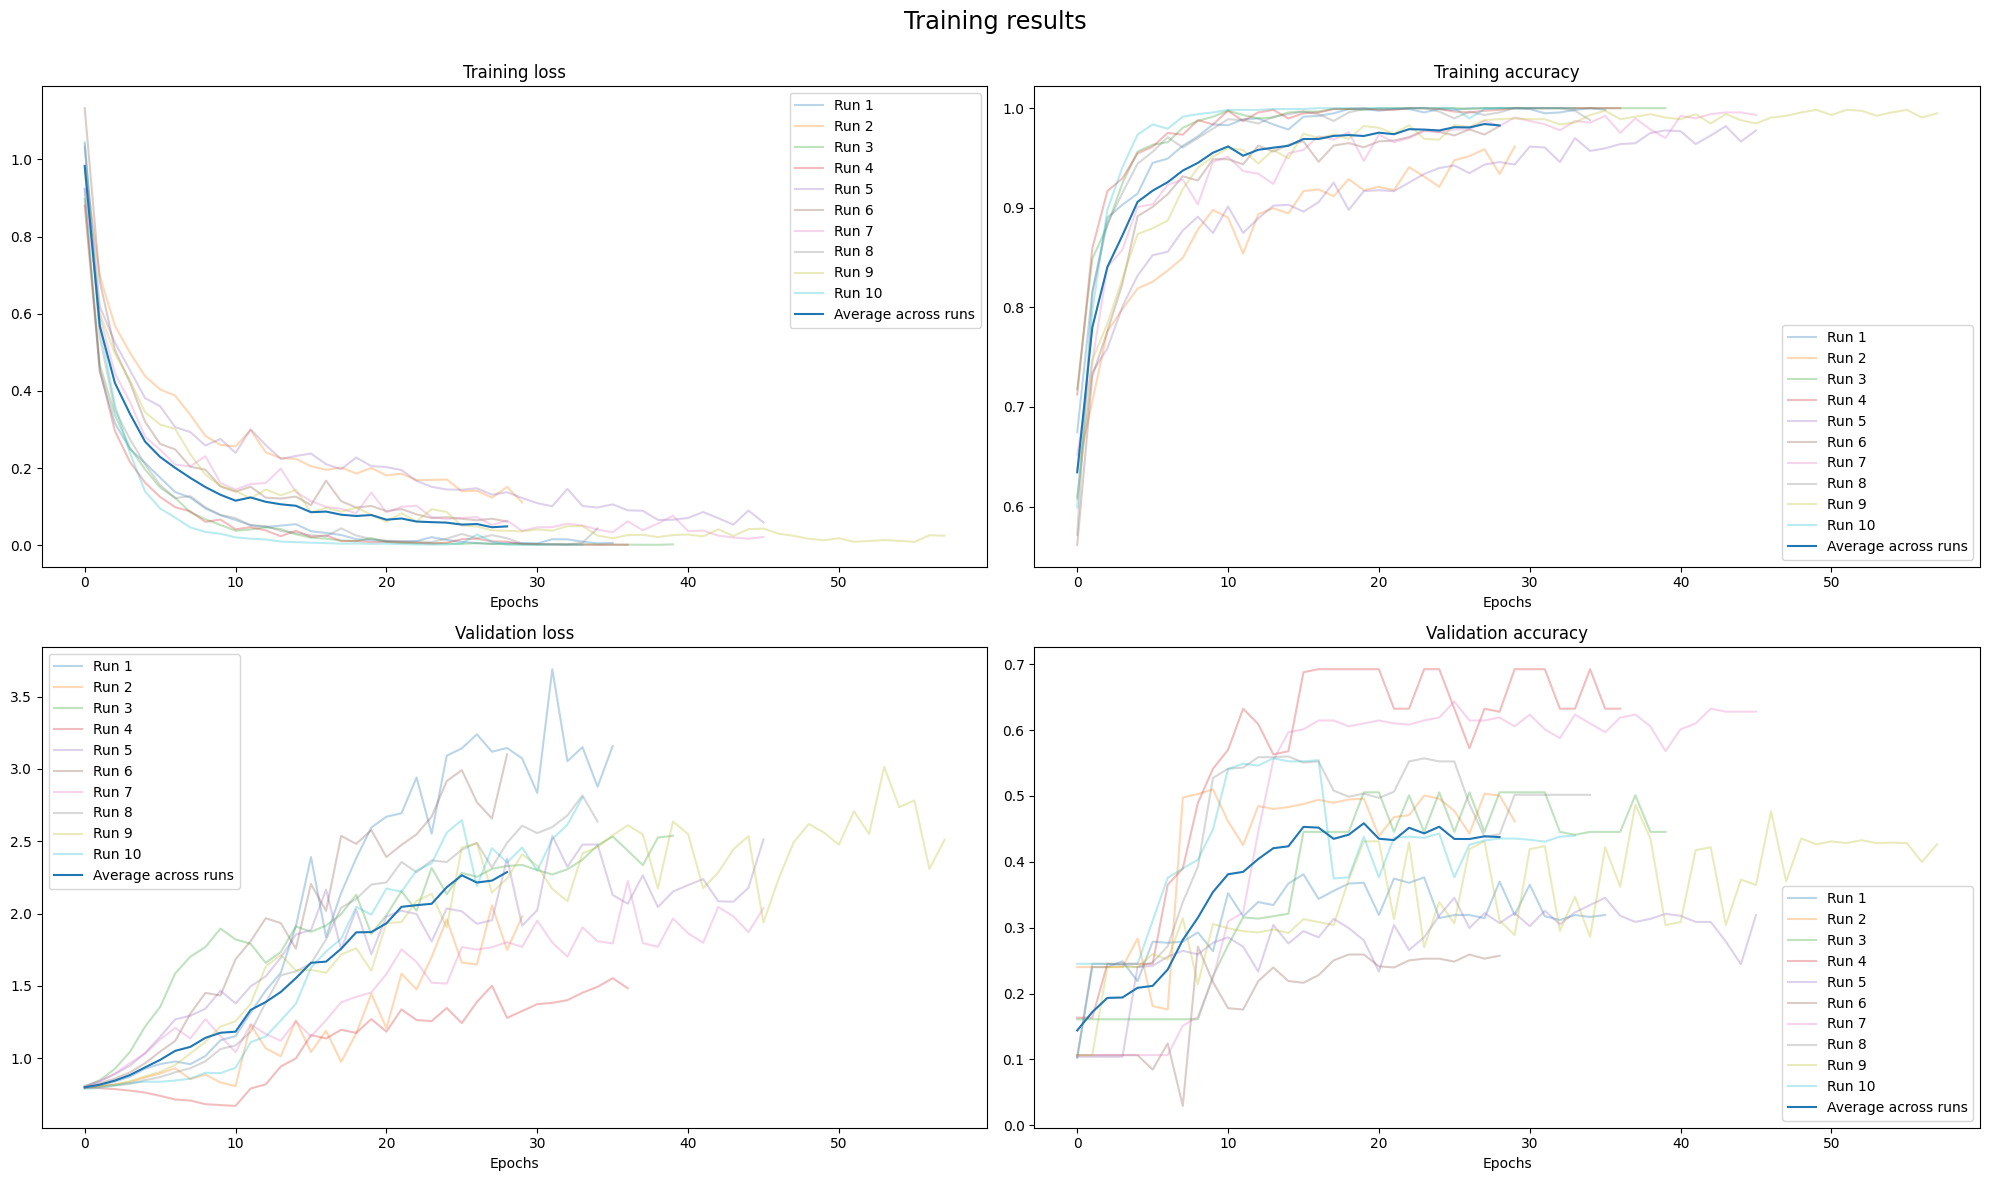

In [19]:
plot_classifier_hist(hist_dict, validation=True, title="Training results", fig_size=(20, 12))

In [20]:
for i, t in enumerate(model_list):
    print(f"{i}-th run - Best validation accuracy: {t[1]:.2%}")

0-th run - Best validation accuracy: 38.09%
1-th run - Best validation accuracy: 50.99%
2-th run - Best validation accuracy: 50.54%
3-th run - Best validation accuracy: 69.25%
4-th run - Best validation accuracy: 34.54%
5-th run - Best validation accuracy: 27.13%
6-th run - Best validation accuracy: 64.33%
7-th run - Best validation accuracy: 56.00%
8-th run - Best validation accuracy: 48.65%
9-th run - Best validation accuracy: 55.72%


In [21]:
"""# ========================================================
#### Final training

# Over-sample whole training set
y_train_nohot = np.zeros(shape=(0,), dtype="int32")
for y in y_train:
    y_train_nohot = np.append(y_train_nohot, np.flatnonzero(y))
n = np.count_nonzero(y_train_nohot == 0)  # most frequent label
X_train2 = X_train[y_train_nohot == 0]
y_train2 = y_train[y_train_nohot == 0]
for c in [1, 2, 3, 4]:
    c_idx = np.where(y_train_nohot == c)[0]
    choices = np.random.choice(c_idx, n)
    X_train2 = np.concatenate([X_train2, X_train[choices]])
    y_train2 = np.concatenate([y_train2, y_train[choices]])

X_train2 = X_train
y_train2 = y_train

model = Net((1, win_len, n_ch))
loss = tf.keras.losses.CategoricalCrossentropy()  # from_logits=True) #from_logits era True perché non applicavamo la Softmax nel modello, invece per utilizzare la early_stopping_callback ci serve
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

history = model.fit(
  X_train2,
  y_train2,
  epochs=60,  # see plot above
  verbose=2,
  batch_size=32,
  class_weight=train_class_weights,
)"""

model = model_list[3][0]  # Non facciamo il final training ma prendiamo il modello con validation accuracy più alta (vedi stampa sopra)



141/141 [==============================] - 1s 5ms/step
(4500,)
(4500,)
              precision    recall  f1-score   support

           N       0.97      0.99      0.98      2627
           r       0.94      0.87      0.90      1590
           S       0.31      0.51      0.38        86
           V       0.34      0.37      0.36       175
           Q       0.33      0.14      0.19        22

    accuracy                           0.91      4500
   macro avg       0.58      0.58      0.56      4500
weighted avg       0.92      0.91      0.91      4500

CONFUSIONNNN [2596    3   22    6    0   34 1385   57  110    4   23   10   44    8
    1   21   71   17   65    1    9    5    3    2    3]
f1 score 0.9123381149926152
f2 score 0.910349362447197
micro avg (0.9095555555555556, 0.9095555555555556, 0.9095555555555556, None)
mae 0.16355555555555557
sens 0.9095555555555556
spec 0.9662388465015701
Balanced accuracy 0.9378972010285629
CONFUSIONNNN 25


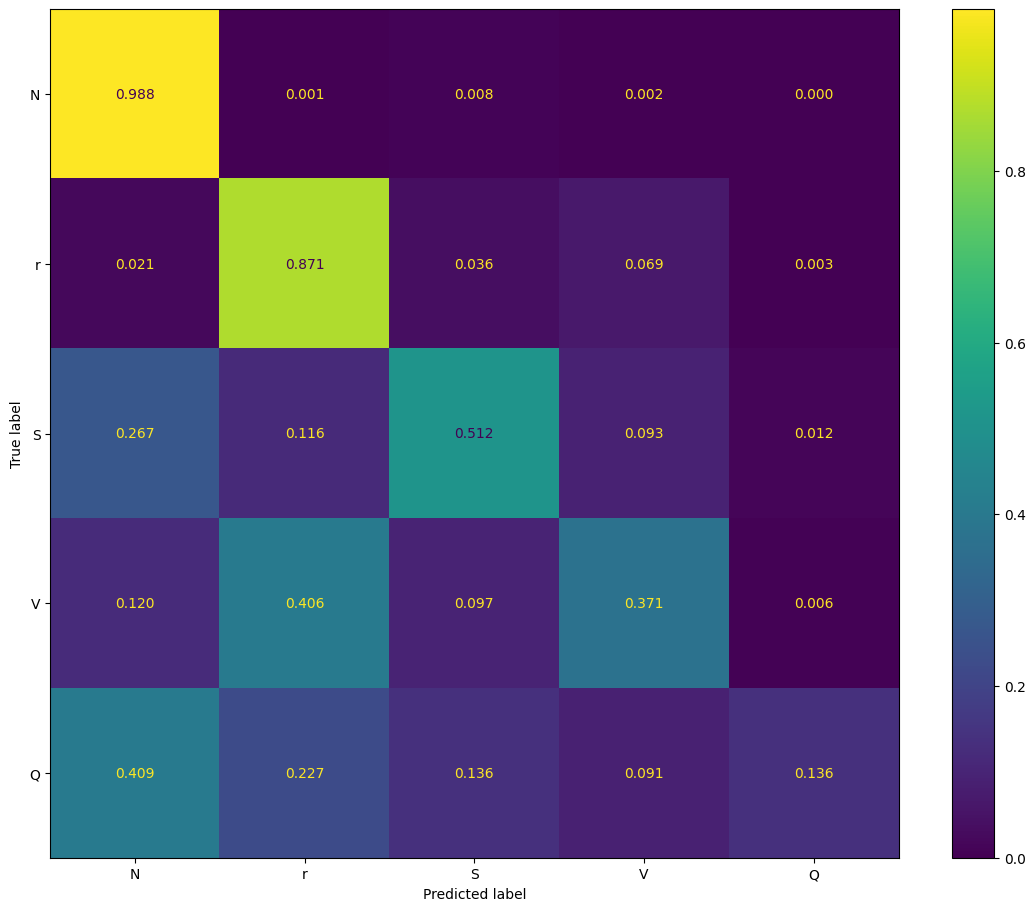

In [22]:
#### Confusion matrix, f2 score, Sensibility and Sensitivity ####
import seaborn as sns

from sklearn.metrics import classification_report, fbeta_score, precision_recall_fscore_support

###Tip ma NON si fa: sosituiamo X_test con heartbeats e y_test con one_hot_labels perché così fa l'accuracy guardando TUTTO il dataset e non il dataset splittato (quindi i risultati ovviamente saranno migliori)
y_pred = model.predict(X_test) # X_test or heartbeats (X_test is 20% of heartbeats)=>y_pred are the predcited labels of X_test

y_test_nohot, y_pred_nohot = [], []
for y1, y2 in zip(y_test, y_pred):  #y_test or one_hot_labels (y_test is the test labels so is 20% of one_hot_labels)
    y_test_nohot.append(np.argmax(y1))
    y_pred_nohot.append(np.argmax(y2))

y_test_nohot = np.asarray(y_test_nohot)
y_pred_nohot = np.asarray(y_pred_nohot)

print(y_pred_nohot.shape)
print(y_test_nohot.shape)

target_names = ['N', 'r', 'S', 'V', 'Q']
print(classification_report(y_test_nohot, y_pred_nohot, target_names=target_names))

_, ax = plt.subplots(figsize=(12, 9), layout="constrained")  # figsize weight*high  #'_,' is as 'figure;' in matlab
ax.grid(False)
disp = ConfusionMatrixDisplay.from_predictions(
    y_test_nohot,
    y_pred_nohot,
    normalize="true",
    display_labels=('N', 'r', 'S', 'V', 'Q'),
    #xticks_rotation=45,
    values_format=".3f",
	  #cmap=plt.cm.Blues,
    ax=ax,
)

from sklearn.metrics import balanced_accuracy_score, confusion_matrix, mean_absolute_error
from imblearn.metrics import sensitivity_score, specificity_score

print('CONFUSIONNNN',confusion_matrix(y_test_nohot, y_pred_nohot).ravel())

y_pred_binarized = y_test_nohot == y_pred_nohot #1 is true 0 is false
y_test_binarized = np.ones(y_test_nohot.shape[0])

tn, fp, fn, tp = confusion_matrix(y_pred_binarized, y_test_binarized).ravel()

sens = sensitivity_score(y_pred_nohot, y_test_nohot, average = 'weighted')
spec = specificity_score(y_pred_nohot, y_test_nohot, average = 'weighted')

mae = mean_absolute_error(y_pred_nohot, y_test_nohot)

'''
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
balanced_acc = (sensitivity + specificity) / 2
'''
#bac = balanced_accuracy_score(y_test_nohot, y_pred_nohot)
#im = ax.images
#cb = im[-1].colorbar
#cb.remove()
print('f1 score',f1_score(y_test_nohot,y_pred_nohot, average='weighted'))
print('f2 score', fbeta_score(y_test_nohot,y_pred_nohot,beta=2,average='weighted'))
print('micro avg', precision_recall_fscore_support(y_test_nohot, y_pred_nohot, average='micro'))
print('mae', mean_absolute_error(y_test_nohot, y_pred_nohot))
print('sens', sens)
print('spec', spec)
print('Balanced accuracy',(sens+spec)/2)
#print('bac', bac)
print('CONFUSIONNNN',np.size(confusion_matrix(y_test_nohot, y_pred_nohot).ravel()))
plt.show()

In [ ]:
tf2onnx.convert.from_keras(modello, output_path='model.onnx')


(ir_version: 8
 producer_name: "tf2onnx"
 producer_version: "1.15.1 d5b7f3"
 graph {
   node {
     input: "input_1"
     input: "new_shape__88"
     output: "HappyModel/conv0/Conv2D__6:0"
     name: "HappyModel/conv0/Conv2D__6"
     op_type: "Reshape"
     domain: ""
   }
   node {
     input: "HappyModel/conv0/Conv2D__6:0"
     input: "HappyModel/conv0/Conv2D_weights_fused_bn"
     input: "HappyModel/conv1/Conv2D_bias_fused_bn"
     output: "HappyModel/bn0/FusedBatchNormV3:0"
     name: "HappyModel/conv0/Conv2D"
     op_type: "Conv"
     attribute {
       name: "dilations"
       ints: 1
       ints: 1
       type: INTS
     }
     attribute {
       name: "strides"
       ints: 1
       ints: 1
       type: INTS
     }
     attribute {
       name: "kernel_shape"
       ints: 1
       ints: 7
       type: INTS
     }
     attribute {
       name: "group"
       i: 1
       type: INT
     }
     attribute {
       name: "auto_pad"
       s: "NOTSET"
       type: STRING
     }
     a

In [ ]:

converter =tf.lite.TFLiteConverter.from_keras_model(modello)
tflite_model = converter.convert()

# Save the model.
with open('tcn.tflite', 'wb') as f:
    f.write(tflite_model)